## Introduction to *Plotly* with Heat Equation

$$
\begin{align*}
&\qquad \frac{\partial u}{\partial t} = -U\frac{\partial u}{\partial x} + \frac{k}{ρ} \frac{\partial^2 u}{\partial x^2}\\[15pt]
\end{align*}
$$

where $U$ is the horizontal constant velocity, $k$ is the thermal diffusivity and $ρ$ the medium's density. 

Let $\; U = 0.2$ and $\; a=\frac{k}{ρ}$ where the domain extends $\; 0 \leq x \leq 1$

**Initial Temperature:**

$u = sin(2\pi x) + 2cos(4\pi x) + 0.2  \;$ for $\; t=0$

**Boundary Conditions:**

Periodic boundary conditions are used for simplicity.

**Uniform Dicritization:**

- Spacal step: $\;  δx = 0.05$

- Time step: $\; δt = 0.001$

### Solution Method (Finete Differecnes)

Explict Euler Method: Forward in time and Centered in space (FTCS)

$$
\begin{align*}
&\qquad \frac{\partial u}{\partial t} = -U\frac{\partial u}{\partial x} + a\frac{\partial^2 u}{\partial x^2}  \\[15pt]
&\Rightarrow \frac {u^{n+1}_i - u^n_i}{δt} = -U\frac {u^n_{i+1} - u^n_{i-1}}{2δx} + a\frac{u^n_{i+1} - 2u^n_{i} + u^n_{i-1}}{(δx)^2} \\[15pt]
&\Rightarrow u_i^{n+1} = u_i^n - \frac{Uδt}{2δx}(u_{i+1}^n-u_{i-1}^n) + \frac{aδt}{(δx)^2}(u^n_{i+1} - 2u^n_{i} + u^n_{i-1})
\end{align*}
$$

where the discritized advection is the second term in the righ hand of the equation and the third term is the respective diffusion.

### Stability

There are two dimensionless parameters which both have to satisfy the following conditions, the *Courant* number $\; c=\frac{Uδt}{δx}<1$ and $\; r=\frac{a δt}{(δx)^2}<0.5$.

Both condtitions ensure the solution's stability. For the second parameter, a descritvive proof based on [1] is the following: 

Avoiding the advection term Heat Equation becomes 
$$
\begin{align*}
&\qquad \frac{\partial u}{\partial t} =  a \frac{\partial^2 u}{\partial x^2}\\[15pt]
\end{align*}
$$

Implimenting FTCS shceme the solution becomes $$ u^{n+1}_i = r u^{n}_{i+1} + (1- 2 r) u^{n}_i +r u^{n}_{i-1}$$ where $i=0,1,...,N$ 

Using matricies the FTCS scheme is written as 

$$ 
\begin{pmatrix}
u^{n+1}_1 \\[3pt]
. \\[3pt]
. \\[3pt] 
. \\[3pt]
u^{n+1}_{N-1} \\[3pt]
\end{pmatrix} = 
\begin{pmatrix}
(1-2r) & r & 0 & . & . & . \\[3pt]
r & (1-2r) & r & . & . & . \\[3pt]
\\[3pt]
. & . & . & r & (1-2r) & r \\[3pt]
. & . & . & 0 & r & (1-2r) \\[3pt]
\end{pmatrix} 
\begin{pmatrix}
u^{n}_1 \\[3pt]
. \\[3pt]
. \\[3pt] 
. \\[3pt]
u^{n}_{N-1} \\[3pt]
\end{pmatrix} + b \\[20pt] $$  
where the $b$ column is definded by the boundary conditions and the system is written as $\; u^{n+1} = A u^{n} +b $.

From $\textit{Lax-Richtmyer's theorem}$, the system is stable if $\left\| A \right\| \le 1$ and so the modulus of every einvalue of $A$ does not excced one; $\lvert λ \rvert \le 1 \enspace \textit{(1)}.$
The $\textit{Gerschgorin's circle theorem}$ states that $\; \lvert λ-a_{s,s}\rvert \le P_{s} \;$ where $P_{s}$ is the sum of the moduli of the elements along the sth row excluding the diagonial element $a_{s,s}.$ This leads to $\lvert λ-1 + 2r\rvert \le 2r \;$ for $\; i=1,...,N-1\;$ and after using $\textit{(1)}$ and doing some algebra the result is $\; 0\le r \le 0.5.\\$ Moreover for evenlly discrietized 2D Heat Equation (Δx=Δy) it has been proved that $\; r \le \frac{1}{4}.$




In [1]:
import numpy as np
import plotly.graph_objects as go

L=1
T=1
a=0.01
dx=0.01
dt=0.001
U=1.5
c=U*dt/dx
r=(a*dt)/(dx**2)
x=np.arange(0,L+dx,dx)
t=np.arange(0,T+dt,dt)
u=np.full((len(t),len(x)),np.nan)
u[0,:]=np.sin(2*np.pi*x)+2*np.cos(4*np.pi*x)+0.2

## Initial Temperature plot

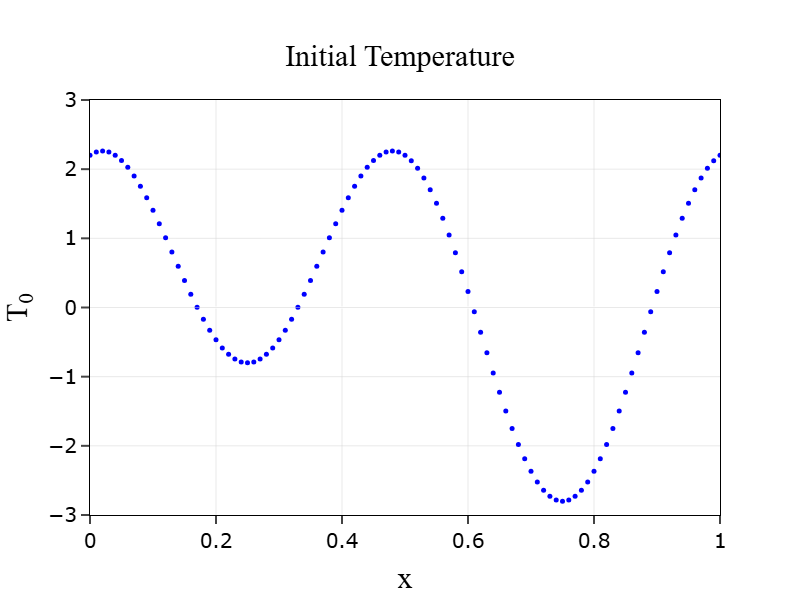

In [2]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=u[0,:], mode="markers", marker=dict(color="blue",size=5)))

#-- With add_trace we add one or more graph elements. Default mode is "lines" so for actual scatter plot we set mode="markers" --

# --- PLOT AND TITLE ---

fig.update_layout(title=dict(text="Initial Temperature",x=0.5,y=0.925,
                             font=dict(family="Linux Libertine O",color="Black",size=30)),
                             width=800,height=600,plot_bgcolor="White",
                             xaxis_title="x",xaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"),
                             yaxis_title="T<sub>0</sub>",yaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"))

# Html workaround for subscript T<sub>0</sub>. Plotly does not support direct rotation of axes labels.

# --- AXES AND LINES ---

fig.update_xaxes(range=[0,1],linecolor="black",showline=True,mirror=True,
                 showgrid=True,gridcolor="lightgray",gridwidth=0.5,
                 tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)

# It is necesary for plot and grid lines to be shown since the plot backgroud color is white. Mirror is for showing the Top and Right plot axes. 

fig.update_yaxes(range=[-3,3],linecolor="black",showline=True,mirror=True,
                 showgrid=True,gridcolor="lightgray",gridwidth=0.5,
                 tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)

# Optional: Change tick values, fig.update_xaxis(tickvals=[0.0, 0.2, ...])

# --- HIDDEN HORIZONTAL GRID LINE ---

fig.add_hline(y=0,line_width=0.5,line_color="lightgray")
fig.write_image("Heatmap.svg")
fig.show(renderer="png")
# --- By Default grid lines have got width=1.

## Working with Numpy Sclicing

In [3]:
if (c<1)&(r<0.5):
    for n in range(0, len(t)-1):
        u[n+1,1:-1] = u[n,1:-1] - c*0.5*(u[n,2: ] - u[n,0:-2]) + r*(u[n,2:] - 2*u[n,1:-1] + u[n,0:-2])

        # Periodic Boundary Conditions 
        u[n+1, 0] = u[n, 0] - c*0.5*(u[n, 1] - u[n, -1]) + r*(u[n,1] - 2*u[n,0] + u[n,-1])        
        u[n+1,-1] = u[n,-1] - c*0.5*(u[n, 0] - u[n, -2]) + r*(u[n,0] - 2*u[n,0] + u[n,-2])
else:
    print("Unstable Problem")

## Animation

In [ ]:
frames=[go.Frame(data=[go.Scatter(x=x,y=u[k])]) for k in range(len(t))]

fig=go.Figure(frames=frames,data=[go.Scatter(x=x,y=u[0,:],line=dict(color="blue",width=1.5))], 
        
#---updatemenus[...] controls the interactive UI widgets and here there are only buttons. (x,y) is the position of the button menu. 
# showactive=True/False the buttons stays or not highlighted after clicking. direction=" ", put buttons in a row---

    layout=go.Layout(updatemenus=[dict(x=0.1,y=-0.12,type="buttons",showactive=False,direction="left",xanchor="center",
                                       
##---arguments, args[..] tells plotly how to animate. None means animate through all frames in order. 
# duration=0 immediatly jump to next frame (no delay). redraw=True fully update the plot for each frame 
# transition=... controls the transition animation between frames. mode="immediate" starts animation immediatly

                buttons=[dict(label="Play", method="animate",args=[None, dict(frame=dict(duration=0,redraw=True),transition=dict(duration=0),fromcurrent=True,mode="immediate")]),

#---For Pause Button, argumnets have to be written args[ [None], ...] and not args[None,...] otherwise Plotly restarts the animation from frame 0.                     

                        dict(label="Pause",method="animate",args=[[None], dict(frame=dict(duration=0,redraw=False),transition=dict(duration=0),mode="immediate")])])]))

fig.update_layout(title=dict(text="Temperature",x=0.5,y=0.925,
                             font=dict(family="Linux Libertine O",color="Black",size=30)),
                             width=800,height=600,plot_bgcolor="white",paper_bgcolor="rgba(255,255,255,0.9)", #--Lightgray with transpareny--
                             xaxis_title="x",xaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"),
                             yaxis_title="T",yaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"))

fig.update_xaxes(range=[0,1],linecolor="black",showline=True,mirror=True,
                 showgrid=True,gridcolor="lightgray",gridwidth=0.5,
                 tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)

fig.update_yaxes(range=[-3,3],linecolor="black",showline=True,mirror=True,
                 showgrid=True,gridcolor="lightgray",gridwidth=0.5,
                 tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)

fig.add_hline(y=0,line_width=0.5,line_color="lightgray")
fig.show()

## 2D Heat Equation

In [3]:
L=1
T=2
a=0.01
dx=dy=0.01
dt=0.001
U=1.5
c=U*dt/dx
r=(a*dt)/(dx**2)
x=np.arange(0,L+dx,dx)
y=np.arange(0,L+dy,dy)
t=np.arange(0,T+dt,dt)
f=np.full((len(t),len(x),len(y)),np.nan)

### Initial Temperature

A gaussian temperature distribution: $u(x,y,0)=exp{(-\frac{(x-x_0)^2}{σ_{0x}} - \frac{(y-y_0)^2}{σ_{0y}})}$  

where $x_{0} \;$, $y_{0} \;$ are its center coordinates and $\;σ_{0x}\;,σ_{0y}\;$ the respective standard deviations. As the STD becomes smaller the Gaussian Distributions becomes narrower to the respective direction.

In [4]:
X,Y=np.meshgrid(x,y)
f[0]=np.exp( -((X-0.25)**2)/0.01 - ((Y-0.5)**2)/0.1)

#---Creating a box with constant zero temperature---

x1,x2=0.7,0.8
y1,y2=0.45,0.55
mask=(X>=x1)&(X<=x2)&(Y>=y1)&(Y<=y2)
f0=f[0].copy()
f0[mask]=np.nan

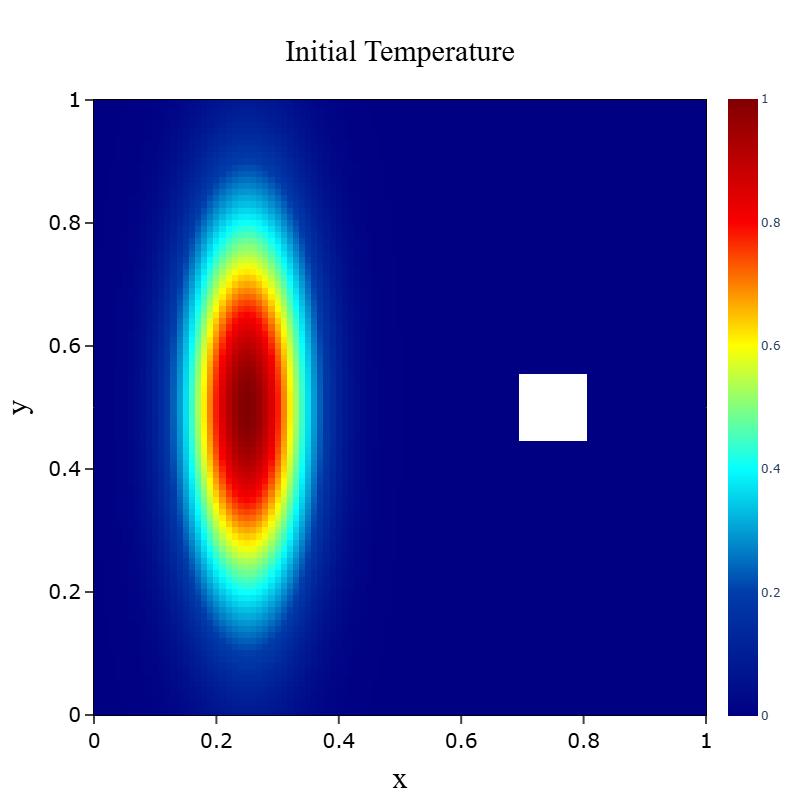

In [5]:
fig=go.Figure(data=go.Heatmap(x=x,y=y,z=f0,colorscale="Jet",colorbar=dict(yanchor="middle",len=637,lenmode="pixels"))) #--"Vridis" as well, etc.

#---Changing len and lenmode is necessary to align Colorbar and plotted area when the size of title and axis labels are changed. When lenmode="fraction" then len=1.0---

fig.update_layout(title=dict(text="Initial Temperature",x=0.5,y=0.95,
                             font=dict(family="Linux Libertine O",color="Black",size=30)),
                             width=800,height=800,plot_bgcolor="White",
                             xaxis_title="x",xaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"),
                             yaxis_title="y",yaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"))

fig.update_xaxes(range=[0,1],linecolor="black",showline=True,mirror=True,tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)

fig.update_yaxes(range=[0,1],linecolor="black",showline=True,mirror=True,tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)
fig.show(renderer="png")
fig.write_image("Heatmap.svg") # For static image when python script is run set fig.show(renderer="png/svg") after pip install --upgrade kaleido

## Working with Numpy Sclicing

In [38]:
if (c<1) & (r<0.25):
    for n in range(0, len(t)-1):
        f[n+1,1:-1,1:-1] = f[n,1:-1,1:-1] - 0.5*c*(f[n,1:-1,2:] - f[n,1:-1,0:-2]) + r*(f[n,1:-1,2:] - 2*f[n,1:-1,1:-1] + f[n,1:-1,0:-2]) + r*(f[n,2:,1:-1] - 2*f[n,1:-1,1:-1] + f[n,0:-2,1:-1])

        # Periodic Boundary Conditions

        f[n+1,1:-1,0] = f[n,1:-1,0] - 0.5*c*(f[n,1:-1,1] - f[n,1:-1,-1]) + r*(f[n,1:-1,1] - 2*f[n,1:-1,0] + f[n,1:-1,-1]) + r*(f[n,2:,0] - 2*f[n,1:-1,0] + f[n,0:-2,0])

        f[n+1,1:-1,-1] = f[n,1:-1,-1] - 0.5*c*(f[n,1:-1,0] - f[n,1:-1,-2]) + r*(f[n,1:-1,0] - 2*f[n,1:-1,-1] + f[n,1:-1,-2]) + r*(f[n,2:,-1] - 2*f[n,1:-1,-1] + f[n,0:-2,-1])

        f[n+1,0,1:-1] = f[n,0,1:-1] - 0.5*c*(f[n,0,2:] - f[n,0,0:-2]) + r*(f[n,0,2:] - 2*f[n,0,1:-1] + f[n,0,0:-2]) + r*(f[n,1,1:-1] - 2*f[n,0,1:-1] + f[n,-1,1:-1])

        f[n+1,-1,1:-1] = f[n,-1,1:-1] - 0.5*c*(f[n,-1,2:] - f[n,-1,0:-2]) + r*(f[n,-1,2:] - 2*f[n,-1,1:-1] + f[n,-1,0:-2]) + r*(f[n,0,1:-1] - 2*f[n,-1,1:-1] + f[n,-2,1:-1])

        # Down-left corner point (i,j=0)

        f[n+1,0,0] = f[n,0,0] - 0.5*c*(f[n,0,1] - f[n,0,-1]) + r*(f[n,0,1] - 2*f[n,0,0] + f[n,0,-1]) + r*(f[n,1,0] - 2*f[n,0,0] + f[n,-1,0])

        # Down-right corner point (i=-1,j=0)

        f[n+1,0,-1] = f[n,0,-1] - 0.5*c*(f[n,0,0] - f[n,0,-2]) + r*(f[n,0,0] - 2*f[n,0,-1] + f[n,0,-2]) + r*(f[n,1,-1] - 2*f[n,0,-1] + f[n,-1,-1])

        # Upper-left corner point (i=0,j=-1)

        f[n+1,-1,0] = f[n,-1,0] - 0.5*c*(f[n,-1,1] - f[n,-1,-1]) + r*(f[n,-1,1] - 2*f[n,-1,0] + f[n,-1,-1]) + r*(f[n,0,0] - 2*f[n,-1,0] + f[n,-2,0])

        # Upper-right corner point (i=-1,j=-1)

        f[n+1,-1,-1] = f[n,-1,-1] - 0.5*c*(f[n,-1,0] - f[n,-1,-2]) + r*(f[n,-1,0] - 2*f[n,-1,-1] + f[n,-1,-2]) + r*(f[n,0,-1] - 2*f[n,-1,-1] + f[n,-2,-1])

        #--The box is kept in constant zero temperature--

        f[n+1][mask]=0

else:
    print("Unstable Problem")

## Animation

In [ ]:
frames=[]
#---Skipping 3 frames for faster visualization---
for k in range(0,len(t),3): 
    f_plot=f[k].copy()
    f_plot[mask]=np.nan
    frames.append(go.Frame(data=[go.Heatmap(x=x,y=y,z=f_plot,colorscale="Jet",zmin=0,zmax=0.5,colorbar=dict(yanchor="middle",len=425,lenmode="pixels"))])) 
f0=f[0].copy()
f0[mask]=np.nan
fig=go.Figure(data=[go.Heatmap(x=x,y=y,z=f0,colorscale="Jet",zmin=0,zmax=0.5,colorbar=dict(yanchor="middle",len=425,lenmode="pixels"))], 
        
            layout=go.Layout(updatemenus=[dict(x=0.1,y=-0.12,xanchor="center",direction="left",type="buttons", showactive=False,
                                        buttons=[dict(label="Play", method="animate", 
                                                    args=[None, dict(frame=dict(duration=0,redraw=True),transition=dict(duration=0),fromcurrent=True,mode="immediate")]), 
                                                dict(label="Pause",method="animate",
                                                    args=[[None], dict(frame=dict(duration=0,redraw=False),transition=dict(duration=0),mode="immediate")])])]),frames=frames)

fig.update_layout(title=dict(text="Warm Bubble Temperature",x=0.5,y=0.925,
                             font=dict(family="Linux Libertine O",color="Black",size=30)),
                             width=800,height=600,plot_bgcolor="White",
                             xaxis_title="x",xaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"),
                             yaxis_title="y",yaxis_title_font=dict(color="black",size=30,family="Linux Libertine O"))

fig.update_xaxes(range=[0,1],linecolor="black",showline=True,mirror=True,tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)

fig.update_yaxes(range=[0,1],linecolor="black",showline=True,mirror=True,tickfont=dict(size=20,color="black"), ticks="outside", ticklen=8, tickwidth=2)
fig.write_html("Animation.html")
fig.show()


## Quick Discaussion

In both 1D and 2D cases, the temperature profiles flow parallel to the x-axis, as it is predicted by the theory, becasuse of the advection term in Heat Equation. On top of that, the temprature decays due to the diffusion term. In the fist case the peak temperature magnitude drops over the time and tends to zero and in the second case the Gaussian Pulse spreads spatially as the heat moves away from the center and its temperature magnitude tends to zero as well. The box is a cold obstacle that facilitates the temperature decaying by slicing the pulse into two lobes.     

## References

[1] Numerical Solution of Partial Differential Equations: Finite Difference Methonds: G.D. SMITH, Third Edition.